In [2]:
# setting up a spam filter

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import sklearn
import seaborn as sns

In [4]:
# dataset is prelabelled, relatively small
# Naive Bayes can train on little data achieving reasonable accuracy

In [5]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection")
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']
sms_raw.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # add spaces around the key to get the word, not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ', case=False
    )

In [7]:
# all upper mark as spam
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [8]:
# change spam column into boolean
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

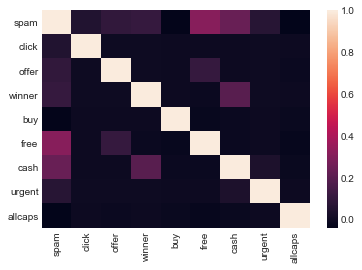

In [9]:
sns.set_style('white')
sns.heatmap(sms_raw.corr())
plt.show()

In [10]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [11]:
# data is boolean, so import Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(data, target)

#classify, store results in variable
y_pred = bnb.predict(data)

#display
print("number of mislabeled points out of total {} points: {}; {:.2f}% accurate".format(
    data.shape[0], (target != y_pred).sum(), ((1-target != y_pred).sum()/data.shape[0] * 100)
))

number of mislabeled points out of total 5572 points: 604; 89.16% accurate


In [12]:
from sklearn.metrics import confusion_matrix
#ham predict ham, ham but predict spam
#spam but predict ham, spam predict spam
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]], dtype=int64)

In [13]:
#create own confusion array
confusion_arr = [[0,0],[0,0]]

for i in range(len(target)):
    if target[i] == False:
        if y_pred[i] == False:
            confusion_arr[0][0] = confusion_arr[0][0] + 1
        else:
            confusion_arr[0][1] = confusion_arr[0][1] + 1
    else:
        if y_pred[i] == True:
            confusion_arr[1][1] = confusion_arr[1][1] + 1
        else:
            confusion_arr[1][0] = confusion_arr[1][0] + 1
print(confusion_arr)
sensitivity = confusion_arr[0][0] / (confusion_arr[0][0] + confusion_arr[0][1])*100
specificity = confusion_arr[1][1] / (confusion_arr[1][0] + confusion_arr[1][1])*100
print('sensitivity: {0:.2f}%\nspecificity: {1:.2f}%'.format(sensitivity, specificity))

[[4770, 55], [549, 198]]
sensitivity: 98.86%
specificity: 26.51%


In [20]:
#testing different holdout groups
from sklearn.model_selection import train_test_split

#train test split to make necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 30% Holdout: 0.885765550239
Testing on Sample: 0.89160086145


In [24]:
#leave one out aka cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([ 0.89784946,  0.89426523,  0.89426523,  0.890681  ,  0.89605735,
        0.89048474,  0.88150808,  0.89028777,  0.88489209,  0.89568345])